## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import random

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_results_ext=study_results.merge(mouse_metadata,on=['Mouse ID'],how='left')
# Display the data table for preview
study_results_ext.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
total_mices=study_results_ext['Mouse ID'].count()
total_mices

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID.
study_results_ext['Duplicated ID and Timepoint']=study_results_ext.duplicated(subset=['Mouse ID','Timepoint'])
duplicated_ID_Timepoint=study_results_ext.loc[study_results_ext['Duplicated ID and Timepoint']==True]
duplicated_ID_Timepoint

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Duplicated ID and Timepoint
137,g989,0,45.000000,0,Propriva,Female,21,26,True
360,g989,5,47.570392,0,Propriva,Female,21,26,True
681,g989,10,49.880528,0,Propriva,Female,21,26,True
869,g989,15,53.442020,0,Propriva,Female,21,26,True
1111,g989,20,54.657650,1,Propriva,Female,21,26,True


In [20]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_results_ext=study_results_ext.drop_duplicates(subset=['Mouse ID','Timepoint'])
#study_results_ext.head()
mouse=study_results_ext.loc[study_results_ext['Mouse ID']=='g989']
mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Duplicated ID and Timepoint
107,g989,0,45.000000,0,Propriva,Female,21,26,False
329,g989,5,48.786801,0,Propriva,Female,21,26,False
620,g989,10,51.745156,0,Propriva,Female,21,26,False
815,g989,15,51.325852,1,Propriva,Female,21,26,False
950,g989,20,55.326122,1,Propriva,Female,21,26,False
1195,g989,25,56.045564,1,Propriva,Female,21,26,False
1380,g989,30,59.082294,1,Propriva,Female,21,26,False
1592,g989,35,62.570880,2,Propriva,Female,21,26,False


In [5]:
# Checking the number of mice in the clean DataFrame.
study_results_ext['Mouse ID'].count()

1888

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

regimen_tumor_data=study_results_ext[['Drug Regimen','Tumor Volume (mm3)']]

# Calculate Mean
mean_by_regimen=regimen_tumor_data.groupby('Drug Regimen').mean()
mean_by_regimen=mean_by_regimen.rename(columns={'Tumor Volume (mm3)':"Mean"})

# Calculate Median
median_by_regimen=regimen_tumor_data.groupby('Drug Regimen').median()
median_by_regimen=median_by_regimen.rename(columns={'Tumor Volume (mm3)':"Median"})
regimen_describe_1=mean_by_regimen.merge(median_by_regimen,on=['Drug Regimen'],how='left')

# Calculate Variance
var_by_regimen=regimen_tumor_data.groupby('Drug Regimen').var()
var_by_regimen=var_by_regimen.rename(columns={'Tumor Volume (mm3)':"Variance"})
regimen_describe_2=regimen_describe_1.merge(var_by_regimen,on=['Drug Regimen'],how='left')

# Calculate Standard Deviation
stdDev_by_regimen=regimen_tumor_data.groupby('Drug Regimen').std()
stdDev_by_regimen=stdDev_by_regimen.rename(columns={'Tumor Volume (mm3)':"Sdt.Dev"})
regimen_describe_3=regimen_describe_2.merge(stdDev_by_regimen,on=['Drug Regimen'],how='left')

# Calculate SEM
SEM_by_regimen=regimen_tumor_data.groupby('Drug Regimen').sem()
SEM_by_regimen=SEM_by_regimen.rename(columns={'Tumor Volume (mm3)':"SEM"})
regimen_describe_groupby=regimen_describe_3.merge(SEM_by_regimen,on=['Drug Regimen'],how='left')

regimen_describe_groupby

,Mean,Median,Variance,Sdt.Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

regimen_describe_agg=regimen_tumor_data.groupby('Drug Regimen').agg(Mean=('Tumor Volume (mm3)','mean'),
                                                                    Median=('Tumor Volume (mm3)','median'),
                                                                    Variance=('Tumor Volume (mm3)','var'),
                                                                    SdtDev=('Tumor Volume (mm3)','std'),
                                                                    SEM=('Tumor Volume (mm3)','sem'),
                                                                   )
regimen_describe_agg

,Mean,Median,Variance,SdtDev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

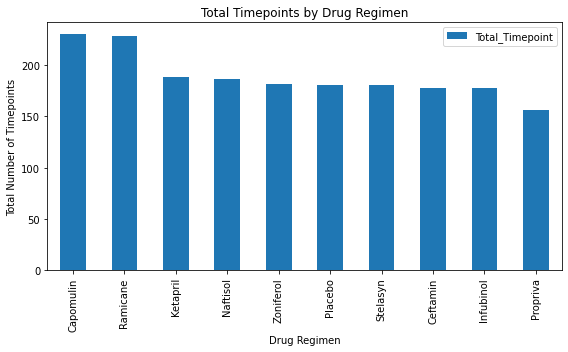

In [8]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
df_timepoints_regimen=study_results_ext.groupby('Drug Regimen').agg(Total_Timepoint=('Timepoint','count'))
df_timepoints_regimen=df_timepoints_regimen.sort_values('Total_Timepoint',ascending=False)
df_timepoints_regimen.plot(kind='bar',figsize=(8,5))
plt.title("Total Timepoints by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Timepoints")
plt.tight_layout()
plt.show()

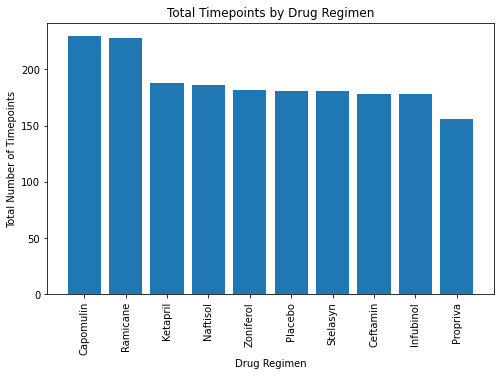

<Figure size 432x288 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
df_timepoints_regimen=study_results_ext.groupby('Drug Regimen',as_index=False).agg(Total_Timepoint=('Timepoint','count'))
df_timepoints_regimen=df_timepoints_regimen.sort_values('Total_Timepoint',ascending=False)
x_axis=np.arange(len(df_timepoints_regimen))
tick_locations=[values for values in x_axis]
plt.figure(figsize=(8,5))
plt.title("Total Timepoints by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Timepoints")
plt.bar(x_axis,df_timepoints_regimen['Total_Timepoint'],align='center')
plt.xticks(tick_locations,df_timepoints_regimen["Drug Regimen"],rotation='vertical')
plt.show()
plt.tight_layout()

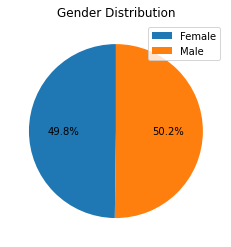

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
df_gender=mouse_metadata.groupby('Sex').agg(Count=('Mouse ID','count'))
pie=df_gender.plot(kind='pie',x='Sex',y='Count',autopct='%1.1f%%',
               startangle=90,labels=None,label='',title='Gender Distribution')
plt.show()

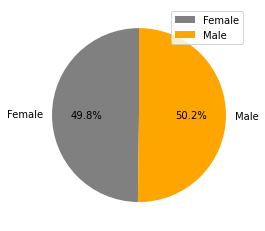

<Figure size 576x576 with 0 Axes>

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
df_gender2=mouse_metadata.groupby('Sex',as_index=False).agg(Count=('Mouse ID','count'))

labels=[sex for sex in df_gender2['Sex']]
sizes=[value for value in df_gender2['Count']]
colors=['gray','orange']

pie2=plt.pie(sizes,labels=labels,colors=colors,autopct="%1.1f%%",startangle=90)
plt.legend(loc='upper right')
plt.figure(figsize=(8,8))
plt.title=("Gender Distribution")
plt.show()


## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
df_4_regimens=study_results_ext.loc[(study_results_ext['Drug Regimen']=='Capomulin')|
                                     (study_results_ext['Drug Regimen']=='Ramicane')|
                                     (study_results_ext['Drug Regimen']=='Infubinol')|
                                     (study_results_ext['Drug Regimen']=='Ceftamin'),:]

# Start by getting the last (greatest) timepoint for each mouse
df_4_regimens=df_4_regimens.sort_values(by=['Mouse ID','Timepoint'],ascending=[True,True])
df_4_regimens_fnl_TumorVol=df_4_regimens.drop_duplicates(subset=['Mouse ID'],keep='last')
df_4_regimens_fnl_TumorVol_for_merge=df_4_regimens_fnl_TumorVol[['Mouse ID','Drug Regimen','Tumor Volume (mm3)']]
df_4_regimens_fnl_TumorVol_for_merge=df_4_regimens_fnl_TumorVol_for_merge.rename(columns={'Tumor Volume (mm3)':'Final Tumor Volume(mm3)'})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
df_4_regimens_ext=pd.merge(df_4_regimens,df_4_regimens_fnl_TumorVol_for_merge,on=['Mouse ID','Drug Regimen'],how='left')
df_4_regimens_ext

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Duplicated ID and Timepoint,Final Tumor Volume(mm3)
0,a203,0,45.000000,0,Infubinol,Female,20,23,False,67.973419
1,a203,5,48.508468,0,Infubinol,Female,20,23,False,67.973419
2,a203,10,51.852437,1,Infubinol,Female,20,23,False,67.973419
3,a203,15,52.777870,1,Infubinol,Female,20,23,False,67.973419
4,a203,20,55.173336,1,Infubinol,Female,20,23,False,67.973419
...,...,...,...,...,...,...,...,...,...,...
809,z581,25,54.316407,2,Infubinol,Female,24,25,False,62.754451
810,z581,30,56.286750,2,Infubinol,Female,24,25,False,62.754451
811,z581,35,58.628399,3,Infubinol,Female,24,25,False,62.754451
812,z581,40,60.053740,3,Infubinol,Female,24,25,False,62.754451


In [13]:
# Put treatments into a list for for loop (and later for plot labels)
treatment=[value for value in df_4_regimens_ext['Drug Regimen']]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[value for value in df_4_regimens_ext['Tumor Volume (mm3)']]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles=df_4_regimens_ext['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
lowerq=quartiles[0.25]
upperq=quartiles[0.75]
iqr=upperq-lowerq
lower_bound=lowerq-1.5*iqr
upper_bound=upperq+1.5*iqr   

# Locate the rows which contain mice on each drug and get the tumor volumes and add subset
subset=df_4_regimens_ext.sample(200)        

# Determine outliers using upper and lower bounds
subset_outliers=subset.loc[(subset['Tumor Volume (mm3)']>upper_bound)|
                           (subset['Tumor Volume (mm3)']<lower_bound)]
subset_outliers

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Duplicated ID and Timepoint,Final Tumor Volume(mm3)
759,y163,45,67.685569,3,Infubinol,Female,17,27,False,67.685569
266,i386,40,67.289621,4,Infubinol,Female,23,29,False,67.289621


<AxesSubplot:title={'center':'Final Tumor Volume Boxplot by Selected Regimens'}>

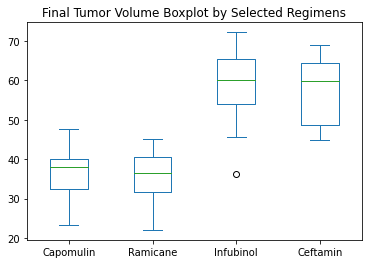

In [26]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
final_tumor_volume=df_4_regimens_fnl_TumorVol[['Drug Regimen','Tumor Volume (mm3)']]

capomulin_final_tumor=final_tumor_volume.loc[final_tumor_volume['Drug Regimen']=='Capomulin']
ramicane_final_tumor=final_tumor_volume.loc[final_tumor_volume['Drug Regimen']=='Ramicane']
infubinol_final_tumor=final_tumor_volume.loc[final_tumor_volume['Drug Regimen']=='Infubinol']
ceftamin_final_tumor=final_tumor_volume.loc[final_tumor_volume['Drug Regimen']=='Ceftamin']

df=pd.DataFrame({'Capomulin':capomulin_final_tumor['Tumor Volume (mm3)'],
                 'Ramicane':ramicane_final_tumor['Tumor Volume (mm3)'],
                 'Infubinol':infubinol_final_tumor['Tumor Volume (mm3)'],
                 'Ceftamin':ceftamin_final_tumor['Tumor Volume (mm3)']})

df[['Capomulin','Ramicane','Infubinol','Ceftamin']].plot(kind='box',title='Final Tumor Volume Boxplot by Selected Regimens')

## Line and Scatter Plots

Mouse Selected: j246
Drug Regimen: Capomulin


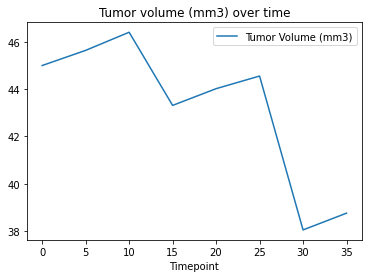

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
df_Capomulin=df_4_regimens_ext.loc[df_4_regimens_ext['Drug Regimen']=='Capomulin',:]
mouse_list=df_Capomulin['Mouse ID'].unique()
random_mouse=random.choice(mouse_list)
df_Capomulin_rMouse=df_Capomulin.loc[df_Capomulin['Mouse ID']==random_mouse]
df_Capomulin_rMouse.plot(kind='line',x='Timepoint',y='Tumor Volume (mm3)',title="Tumor volume (mm3) over time")
print(f"Mouse Selected: {random_mouse}")
print(f"Drug Regimen: Capomulin")

 Drug Regimen: Capomulin


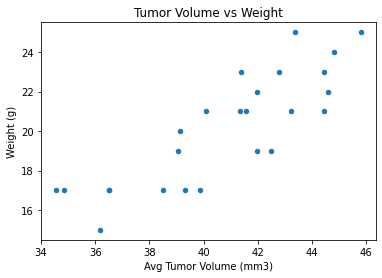

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
df_Capomulin_tumor_weight=df_Capomulin.groupby('Mouse ID').agg(AvgTumorVolume=('Tumor Volume (mm3)','mean'),
                                                              Weight=('Weight (g)','mean'))
df_Capomulin_tumor_weight.plot(kind='scatter',x='AvgTumorVolume',y='Weight',
                               xlabel='Avg Tumor Volume (mm3)',ylabel='Weight (g)',
                              title='Tumor Volume vs Weight')
print(" Drug Regimen: Capomulin")

## Correlation and Regression

The correlation between Weight and Average Tumor Volume is 0.84


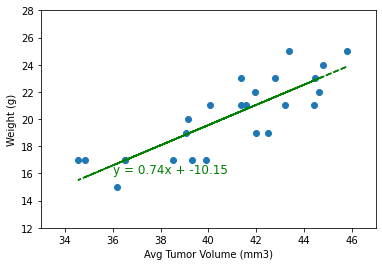

The r-squared value is: 0.7088568047708723


In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
df_Capomulin_tumor_weight=df_Capomulin.groupby('Mouse ID',as_index=False).agg(AvgTumorVolume=('Tumor Volume (mm3)','mean'),
                                                              Weight=('Weight (g)','mean'))
weight=df_Capomulin_tumor_weight.iloc[:,2]
avg_tumor_vol=df_Capomulin_tumor_weight.iloc[:,1]
correlation=st.pearsonr(weight,avg_tumor_vol)
print(f"The correlation between Weight and Average Tumor Volume is {round(correlation[0],2)}")

(slope,intercept,rvalue,pvalue,stderr)=linregress(avg_tumor_vol,weight)
regress_value=slope*avg_tumor_vol + intercept
line_eq="y = "+str(round(slope,2)) + "x + "+str(round(intercept,2))
plt.scatter(avg_tumor_vol,weight)
plt.plot(avg_tumor_vol,regress_value,color='green',linestyle='--')
plt.annotate(line_eq,(36,16),fontsize=12,color='green')
plt.xlabel('Avg Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
plt.xlim(33,47)
plt.ylim(12,28)
plt.show()

print(f"The r-squared value is: {rvalue**2}")